# 홀트-윈터스(계절지수평활법) -> forecast패키지

- 승법적 계절지수평활법 
    * 계절적 진폭이 점차적으로 증가, 감소 특성을 가짐
    * 홀트의 선형지수평활법을 확장

- 가법적 계절지수평활법
    * 계절적 진폭이 시간의 흐름에 따라 일정한 특성을 가짐
    
- 홀트윈터스 함수 사용법
    * hw(ts_data, seasonal='additive', h=5)
        * seasonal 값에 가법모형이면 'additive', 승법모형이면 'multiplicative'
        * h값은 예측하고 싶은 미래의 예측값개수
        * hw함수를 적용한 시계열 데이터의 변수명값들 종류와 의미는 holt_linear과 동일

In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
setwd('C:/Users/joyh1/Desktop/빅데이터_20-1/R_data')

In [3]:
guarantee<-read.csv("guarantee.csv")

In [4]:
guarantee_ts<-ts(guarantee, start=c(2010,1), frequency = 12)
guarantee_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,10171.370,11642.047,10959.327,9631.822,8113.867,7687.780,9488.412,6824.398,7994.816,8849.314,12206.115,11333.561
2011,8727.824,10572.496,16415.667,15322.153,15185.645,15163.094,14389.188,20601.666,18647.374,23842.528,22023.714,25808.477
2012,18701.063,24248.366,25582.786,27755.428,23754.305,24500.540,22192.803,25346.644,21087.194,22098.436,22322.298,17995.997
2013,15670.293,20526.126,21747.386,23859.140,20456.819,18806.497,20355.904,20408.184,23351.360,27050.859,27843.960,25731.259
2014,19108.375,27828.546,25807.760,30713.500,20744.789,25142.929,25815.333,25712.026,26163.303,30937.711,28955.434,31841.921
2015,21774.958,27800.336,31702.518,35253.927,26569.231,32082.366,30595.872,30578.924,33006.815,38044.226,35767.920,31595.067
2016,28039.202,29307.442,41641.324,38111.414,34080.118,33585.952,35442.221,43185.803,29489.532,44859.685,42836.563,40201.332


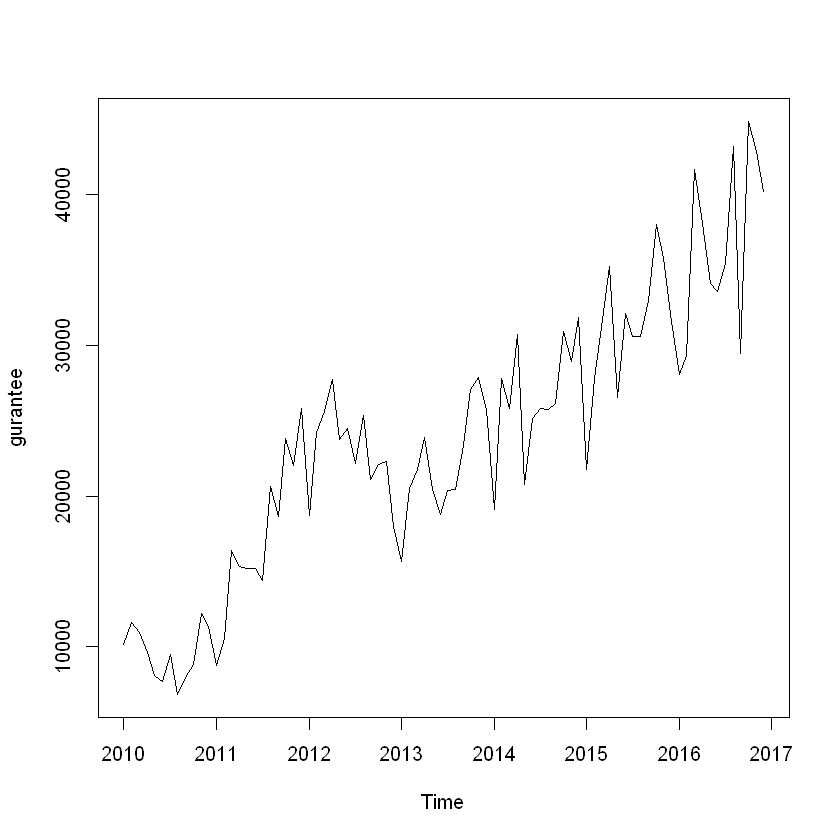

In [5]:
plot(guarantee_ts)

In [6]:
# 홀트윈터스 함수 hw() 에다가 seasonal = '' 으로 가법(additive), 승법(multiplicative) 인자 선택해서 추가
fit1_guarantee<-hw(guarantee_ts, seasonal='additive', h=12)
fit1_guarantee

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2017       35459.43 31363.60 39555.26 29195.40 41723.46
Feb 2017       40208.19 35812.21 44604.16 33485.12 46931.25
Mar 2017       44046.66 39364.13 48729.19 36885.35 51207.98
Apr 2017       45472.16 40514.25 50430.07 37889.69 53054.63
May 2017       40444.04 35220.11 45667.97 32454.72 48433.36
Jun 2017       41917.72 36435.71 47399.73 33533.71 50301.73
Jul 2017       42183.66 36450.40 47916.92 33415.39 50951.92
Aug 2017       43515.15 37536.56 49493.74 34371.69 52658.62
Sep 2017       43778.96 37560.21 49997.70 34268.21 53289.71
Oct 2017       47270.30 40815.96 53724.64 37399.23 57141.36
Nov 2017       47079.32 40393.42 53765.23 36854.11 57304.53
Dec 2017       46388.45 39474.57 53302.33 35814.59 56962.32

In [7]:
fit2_guarantee<-hw(guarantee_ts, seasonal='multiplicative', h=12)
fit2_guarantee

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2017       32410.32 25736.66 39083.99 22203.83 42616.82
Feb 2017       40880.61 31634.24 50126.98 26739.50 55021.72
Mar 2017       47631.55 35949.94 59313.17 29766.07 65497.04
Apr 2017       48479.06 35710.40 61247.72 28951.08 68007.04
May 2017       39162.39 28166.69 50158.09 22345.92 55978.86
Jun 2017       41351.00 29047.22 53654.78 22533.99 60168.01
Jul 2017       40790.29 27990.03 53590.56 21213.98 60366.61
Aug 2017       44745.56 29995.81 59495.31 22187.76 67303.36
Sep 2017       39739.63 26025.62 53453.64 18765.86 60713.40
Oct 2017       49348.47 31571.22 67125.72 22160.52 76536.43
Nov 2017       47600.79 29745.47 65456.11 20293.43 74908.15
Dec 2017       45400.68 27706.62 63094.73 18339.95 72461.40

In [8]:
names(fit1_guarantee)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

In [9]:
fit1_guarantee$model

Holt-Winters' additive method 

Call:
 hw(y = guarantee_ts, h = 12, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.3858 
    beta  = 0.004 
    gamma = 1e-04 

  Initial states:
    l = 6800.5541 
    b = 577.1931 
    s = 647.1556 1809.48 2471.777 -546.217 -339.9333 -1199.132
           -993.3176 -1995.498 3504.914 2550.989 -816.286 -5093.931

  sigma:  3195.991

     AIC     AICc      BIC 
1744.140 1753.413 1785.464 

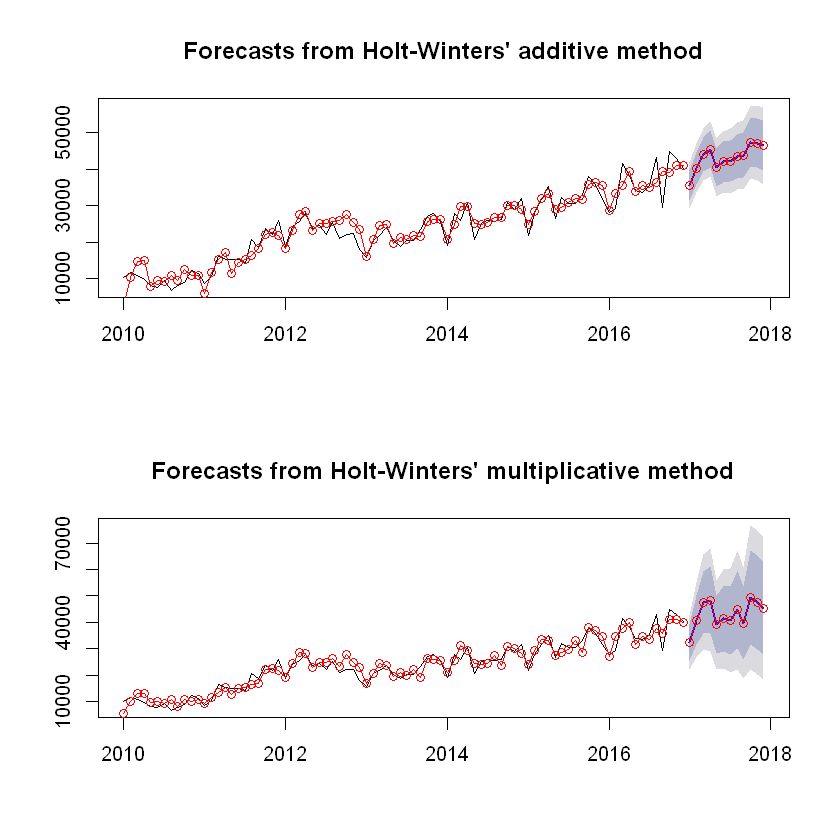

In [10]:
par(mfrow=c(2,1))
# 가법모형
plot(fit1_guarantee)
# 주어진 데이터 fitted된 데이터 그래프라인
lines(fit1_guarantee$fitted, col='red', type='o')
# mean => 예측값
lines(fit1_guarantee$mean, col='red', type='o')

# 승법모형
plot(fit2_guarantee)
# 주어진 데이터 fitted된 데이터 그래프라인
lines(fit2_guarantee$fitted, col='red', type='o')
# mean => 예측값
lines(fit2_guarantee$mean, col='red', type='o')

In [11]:
# RMSE로 어떤게 더 좋은건지 관찰

# 가법모형
summary(fit1_guarantee)

# 승법모형
summary(fit2_guarantee) # RMSE값이 더 작음!


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = guarantee_ts, h = 12, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.3858 
    beta  = 0.004 
    gamma = 1e-04 

  Initial states:
    l = 6800.5541 
    b = 577.1931 
    s = 647.1556 1809.48 2471.777 -546.217 -339.9333 -1199.132
           -993.3176 -1995.498 3504.914 2550.989 -816.286 -5093.931

  sigma:  3195.991

     AIC     AICc      BIC 
1744.140 1753.413 1785.464 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -313.0446 2875.547 2126.937 -2.722669 11.27248 0.3662703
                   ACF1
Training set -0.1643825

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2017       35459.43 31363.60 39555.26 29195.40 41723.46
Feb 2017       40208.19 35812.21 44604.16 33485.12 46931.25
Mar 2017       44046.66 39364.13 48729.19 36885.35 51207.98
Apr 2017       45472.16 40514.25 504

In [12]:
library(fpp2)

Loading required package: ggplot2

Loading required package: fma

Loading required package: expsmooth



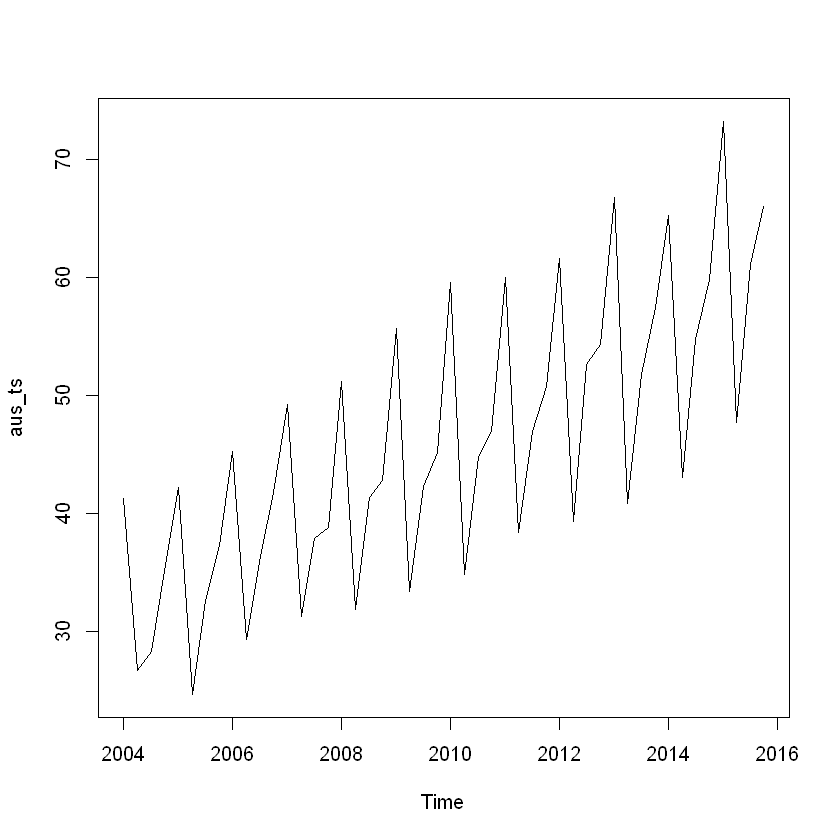

In [13]:
aus_ts<-window(austourists, start=2004)
plot(aus_ts)

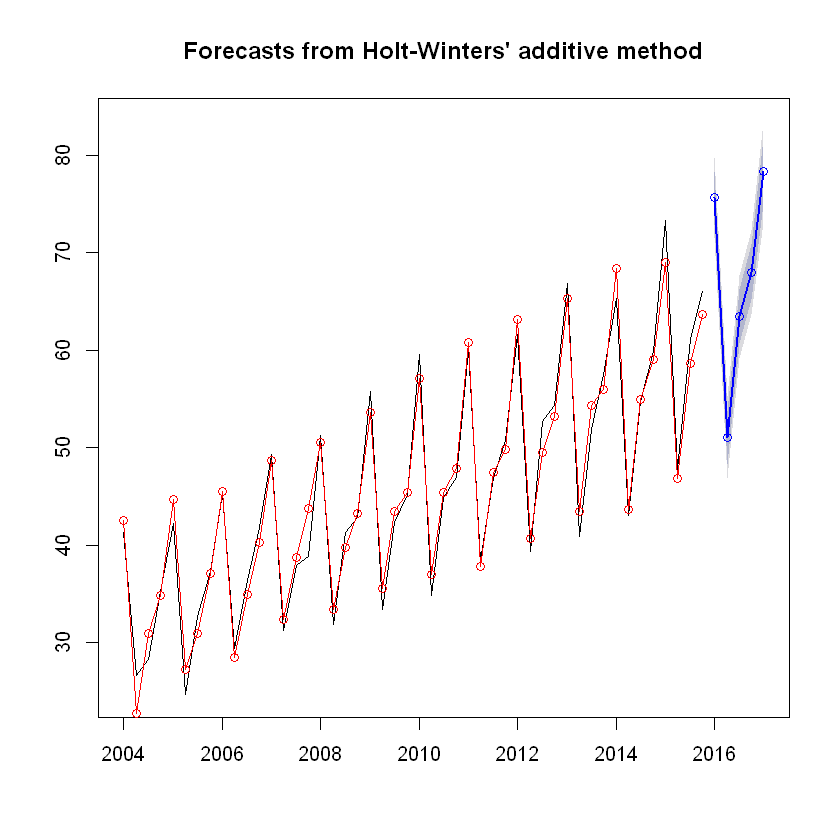

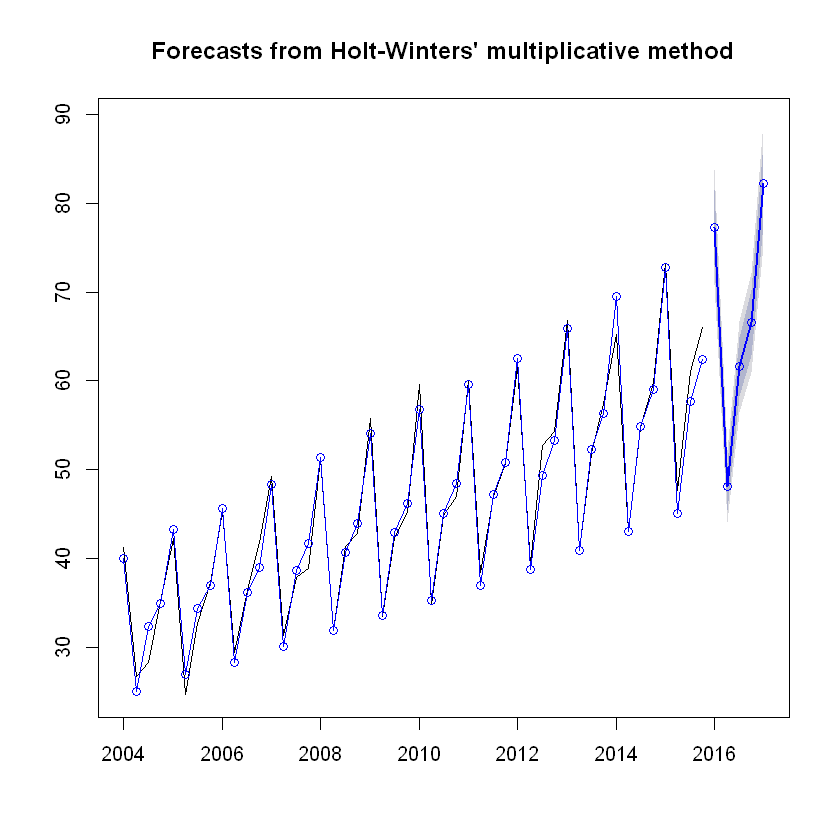

In [14]:
fit1_aus<-hw(aus_ts, seasonal='additive', h=5)
fit2_aus<-hw(aus_ts, seasonal='multiplicative', h=5)

# 가법모형
plot(fit1_aus)
lines(fitted(fit1_aus), col='red', type='o')
lines(fit1_aus$mean, col='blue', type='o')

# 승법모형
plot(fit2_aus)
lines(fitted(fit2_aus), col='blue', type='o')
lines(fit2_aus$mean, col='blue', type='o')



In [15]:
# RMSE로 어떤 모형이 괜찮은지 판단
# 가법모형
summary(fit1_aus)

# 승법모형
summary(fit2_aus) # => RMSE값이 더 낮음..!


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = aus_ts, h = 5, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.1837 
    beta  = 1e-04 
    gamma = 0.5008 

  Initial states:
    l = 31.0078 
    b = 0.6674 
    s = 1.0988 -2.5542 -9.4131 10.8685

  sigma:  2.1039

     AIC     AICc      BIC 
266.4707 271.2075 283.3115 

Error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01255071 1.920596 1.573336 -0.3708501 3.709536 0.5265944
                    ACF1
Training set -0.05084824

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       75.62551 72.92925 78.32178 71.50193 79.74910
2016 Q2       50.99517 48.25374 53.73660 46.80252 55.18782
2016 Q3       63.41423 60.62833 66.20013 59.15356 67.67490
2016 Q4       67.96581 65.13608 70.79554 63.63811 72.29351
2017 Q1       78.29475 74.91570 81.67380 73.12694 83.46255

Forecast method: 